**Classify the Size_Categorie using SVM**

    Data Description:
    
    month -month of the year: 'jan' to 'dec'
    day - day of the week: 'mon' to 'sun'
    FFMC - FFMC index from the FWI system: 18.7 to 96.20
    DMC - DMC index from the FWI system: 1.1 to 291.3
    DC -DC index from the FWI system: 7.9 to 860.6
    ISI - ISI index from the FWI system: 0.0 to 56.10
    temp - temperature in Celsius degrees: 2.2 to 33.30
    RH - relative humidity in %: 15.0 to 100
    wind - wind speed in km/h: 0.40 to 9.40
    rain - outside rain in mm/m2 : 0.0 to 6.4
    Size_Categorie - the burned area of the forest ( Small , Large)

### Importing the required Libraries 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# importing Support Vector Machine
from sklearn import svm
# importing Support Vector Classifier from svm
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# importing warnings
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [2]:
# Reading the dataset
forest = pd.read_csv("forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Performing EDA on the dataset

In [3]:
# to get the information of the datafile
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# to check the null values of the data
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
print("Dimensions -",forest.shape)
print("Column names -",forest.columns)

Dimensions - (517, 31)
Column names - Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')


### Visualizations

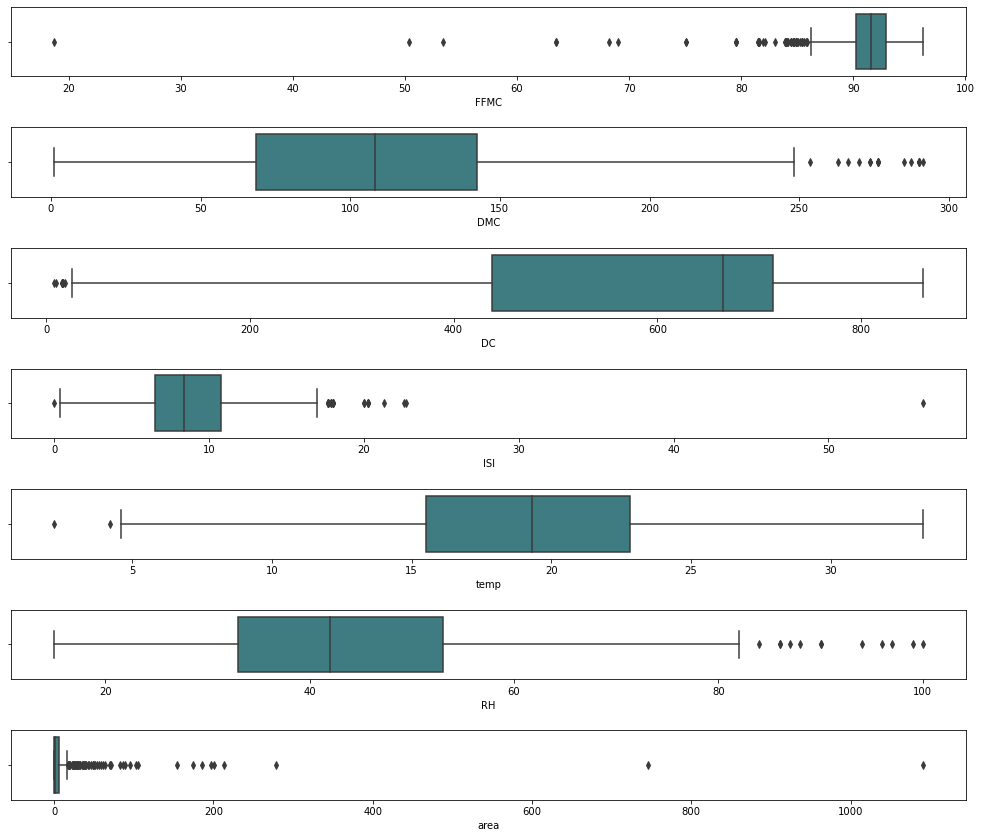

In [6]:
# checking for the Outliers in the variables if present
outlier=forest.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

Skewness: 12.846933533934868
Kurtosis: 194.1407210942299


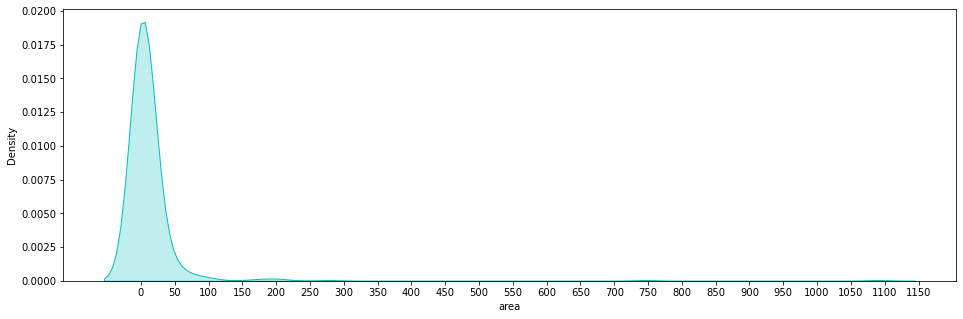

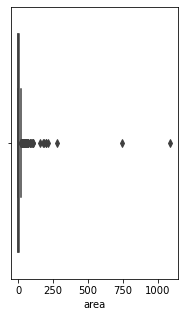

In [7]:
# Visualizing the distribution of the 'area'
plt.figure(figsize=(16,5))
print("Skewness: {}".format(forest['area'].skew()))
print("Kurtosis: {}".format(forest['area'].kurtosis()))
ax = sns.kdeplot(forest['area'],shade=True,color='c')
plt.xticks([i for i in range(0,1200,50)])
plt.show()
plt.figure(figsize=(3,5))
ax = sns.boxplot(forest['area'])

Text(0.5, 1.0, 'Correlation with Forest Fire Size Category')

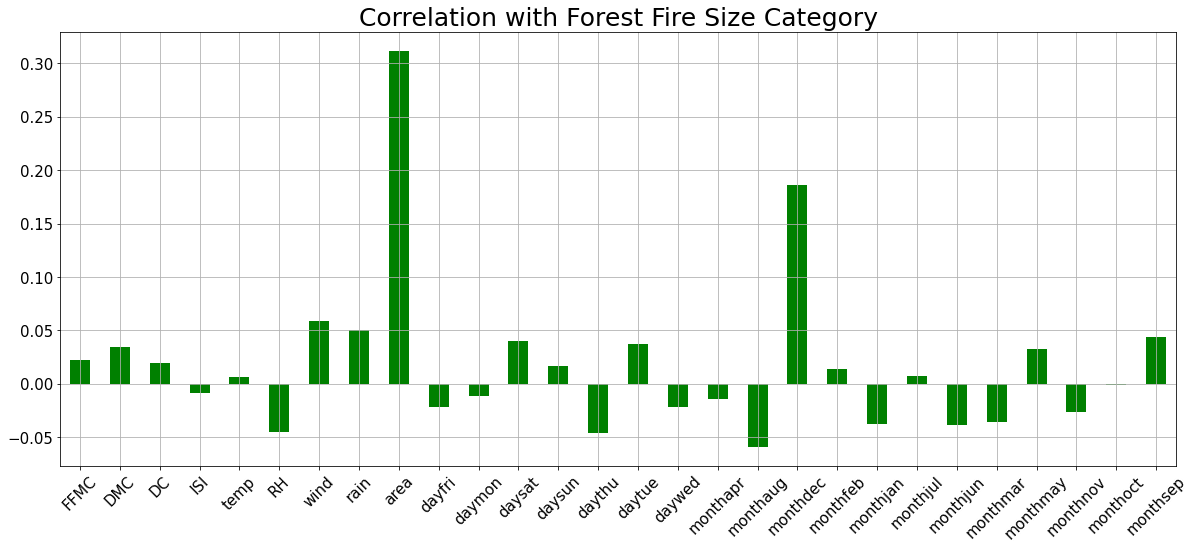

In [8]:
df=forest.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = forest.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (20, 8), fontsize = 15, color = 'green', rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category',
          horizontalalignment="center", fontstyle = "normal", 
          fontsize = "25")

### Data Preprocessing

In [9]:
# to check the dimensions of duplicates in the data
print(forest[forest.duplicated()].shape)

# to get the duplicate values from the data
forest[forest.duplicated()]

(8, 31)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
# Removing the duplicates 
forest1 = forest.drop_duplicates()
forest1.iloc[50:55]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
50,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,...,0,0,0,0,0,0,0,0,1,small
51,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
54,aug,thu,91.7,114.3,661.3,6.3,17.6,45,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
55,sep,thu,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small


In [11]:
# Resetting the index
forest1 = forest1.reset_index()
forest1 = forest1.drop(columns="index")
forest1.iloc[50:55]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
50,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,...,0,0,0,0,0,0,0,0,1,small
51,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,thu,91.7,114.3,661.3,6.3,17.6,45,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
54,sep,thu,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small


In [12]:
# label encoding for the 'size_category' column
forest1[['size_category']] = forest1[['size_category']].astype('category')
forest2 = forest1
forest2['size_category'] = forest2['size_category'].cat.codes
forest2 = forest2.drop(columns=['month','day'])
forest2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


### Train and Test Split
    Splitting the data into Train and Test data

In [13]:
X = forest2.drop(['size_category'],axis=1)
y = forest2[['size_category']]

# Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [14]:
# to get the dimensions of the train and test splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((356, 28), (153, 28), (356, 1), (153, 1))

### Standardization of the data

In [15]:
# standardizing the traing data using StandardScaler function
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print('Standardized X_train Data:\n',X_train)
print('\n\nStandardized X_test Data:\n',X_test)

Standardized X_train Data:
 [[-0.93309521 -1.37294834 -0.80675171 ...  0.         -0.16104844
  -0.69522179]
 [ 0.5363445  -0.13170258  0.0144792  ...  0.         -0.16104844
  -0.69522179]
 [ 0.12915036  0.518012    0.22367611 ...  0.         -0.16104844
  -0.69522179]
 ...
 [ 0.43011994  0.7588266   0.49100601 ...  0.         -0.16104844
  -0.69522179]
 [ 0.48323222  0.56649816  0.71494086 ...  0.         -0.16104844
   1.4383899 ]
 [ 0.07603808  0.35477525  1.08625513 ...  0.         -0.16104844
   1.4383899 ]]


Standardized X_test Data:
 [[ 0.22663336 -1.09256162 -1.83129721 ... -0.08111071 -0.20203051
  -0.7598155 ]
 [-0.05573557 -0.15278764  0.31614152 ... -0.08111071 -0.20203051
  -0.7598155 ]
 [ 0.0760366   0.24344935  0.53189981 ... -0.08111071 -0.20203051
   1.31610898]
 ...
 [ 0.60312525 -0.12774664 -0.49461024 ... -0.08111071 -0.20203051
  -0.7598155 ]
 [ 0.39605471 -0.93495062  0.55257827 ... -0.08111071  4.94974747
  -0.7598155 ]
 [ 0.18898417  0.29647735  1.00243235 ...

## Building the Support Vector Machine Classifier Model

### using Kernel - ' **rbf** '

In [16]:
# Initiating and Fitting the model using the Support Vector Classifier 
rbf_model = SVC(kernel='rbf', random_state=7, gamma=50, C=5)
rbf_model.fit(X_train, y_train)

SVC(C=5, gamma=50, random_state=7)

In [17]:
# Accuracy of the rbf_model predictions
r_pred = rbf_model.predict(X_test)
print('Rbf Kernel accuracy score : {0:0.4f}'. format(accuracy_score(y_test, r_pred)))

Rbf Kernel accuracy score : 0.6928


In [18]:
# printing the classification report 
print(classification_report(y_test, r_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.69      1.00      0.82       106

    accuracy                           0.69       153
   macro avg       0.35      0.50      0.41       153
weighted avg       0.48      0.69      0.57       153



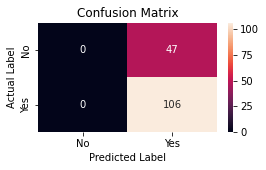

In [19]:
# plotting the confusion matrix to describe the performance of classifier
con = confusion_matrix(y_test, r_pred)
class_label = ["No", "Yes"]
cm = pd.DataFrame(con, index=class_label, columns=class_label)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [20]:
# Checking for overfitting and underfitting
print('Accuracy of the model on Training data : {:.2f}%'.format(rbf_model.score(X_train, y_train)*100))
print('Accuracy of the model on Test data : {:.2f}%'.format(rbf_model.score(X_test, y_test)*100))

Accuracy of the model on Training data : 100.00%
Accuracy of the model on Test data : 69.28%


    Hence, we can observe that the SVM Classifier using 'rbf' kernel is an overfitting model.

### using Kernel - ' **linear** '

In [21]:
# Initiating and Fitting the model using the Support Vector Classifier 
lin_model = SVC(kernel='linear', random_state=42, gamma=50, C=5)
lin_model.fit(X_train, y_train)

SVC(C=5, gamma=50, kernel='linear', random_state=42)

In [22]:
# Accuracy of the linear_model predictions
l_pred = lin_model.predict(X_test)
print('Linear Kernel accuracy score : {0:0.4f}'. format(accuracy_score(y_test, l_pred)))

Linear Kernel accuracy score : 0.9281


In [23]:
# printing the classification report 
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        47
           1       0.91      0.99      0.95       106

    accuracy                           0.93       153
   macro avg       0.94      0.89      0.91       153
weighted avg       0.93      0.93      0.93       153



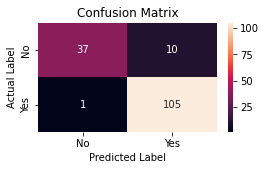

In [24]:
# plotting the confusion matrix to describe the performance of classifier
con = confusion_matrix(y_test, l_pred)
class_label = ["No", "Yes"]
cm = pd.DataFrame(con, index=class_label, columns=class_label)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [25]:
# Checking for overfitting and underfitting
print('Accuracy of the model on Training data : {:.2f}%'.format(lin_model.score(X_train, y_train)*100))
print('Accuracy of the model on Test data : {:.2f}%'.format(lin_model.score(X_test, y_test)*100))

Accuracy of the model on Training data : 96.63%
Accuracy of the model on Test data : 92.81%


    Here, we can observe that the SVM Classifier using linear kernel is neither underfitting nor overfitting model i.e., best fit model

### using Kernel - ' **poly** '

In [26]:
# Initiating and Fitting the model using the Support Vector Classifier 
ply_model = SVC(kernel='poly', random_state=7, gamma=50, C=5)
ply_model.fit(X_train, y_train)

SVC(C=5, gamma=50, kernel='poly', random_state=7)

In [27]:
# Accuracy of the polynomial_model predictions
p_pred = ply_model.predict(X_test)
print('Polynomial Kernel accuracy score : {0:0.4f}'. format(accuracy_score(y_test, p_pred)))

Polynomial Kernel accuracy score : 0.7647


In [28]:
# printing the classification report 
print(classification_report(y_test, p_pred))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57        47
           1       0.80      0.88      0.84       106

    accuracy                           0.76       153
   macro avg       0.73      0.69      0.70       153
weighted avg       0.75      0.76      0.76       153



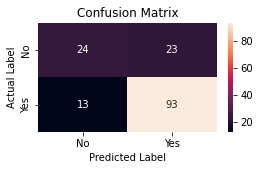

In [29]:
# plotting the confusion matrix to describe the performance of classifier
con = confusion_matrix(y_test, p_pred)
class_label = ["No", "Yes"]
cm = pd.DataFrame(con, index=class_label, columns=class_label)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [30]:
# Checking for overfitting and underfitting
print('Accuracy of the model on Training data : {:.2f}%'.format(ply_model.score(X_train, y_train)*100))
print('Accuracy of the model on Test data : {:.2f}%'.format(ply_model.score(X_test, y_test)*100))

Accuracy of the model on Training data : 100.00%
Accuracy of the model on Test data : 76.47%


    Here, we can observe that the SVM Classifier using 'polynomial' kernel is an overfitting model.

### using Kernel - ' **sigmoid** '

In [31]:
# Initiating and Fitting the model using the Support Vector Classifier 
sig_model = SVC(kernel='sigmoid', random_state=42, gamma=50, C=5)
sig_model.fit(X_train, y_train)

SVC(C=5, gamma=50, kernel='sigmoid', random_state=42)

In [32]:
# Accuracy of the sigmoid_model predictions
s_pred = sig_model.predict(X_test)
print('Sigmoid Kernel accuracy score : {0:0.4f}'. format(accuracy_score(y_test, s_pred)))

Sigmoid Kernel accuracy score : 0.5686


In [33]:
# printing the classification report 
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           0       0.29      0.28      0.28        47
           1       0.69      0.70      0.69       106

    accuracy                           0.57       153
   macro avg       0.49      0.49      0.49       153
weighted avg       0.56      0.57      0.57       153



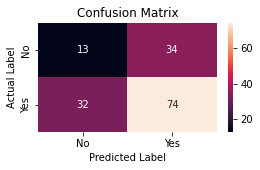

In [34]:
# plotting the confusion matrix to describe the performance of classifier
con = confusion_matrix(y_test, s_pred)
class_label = ["No", "Yes"]
cm = pd.DataFrame(con, index=class_label, columns=class_label)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [35]:
# Checking for overfitting and underfitting
print('Accuracy of the model on Training data : {:.2f}%'.format(sig_model.score(X_train, y_train)*100))
print('Accuracy of the model on Test data : {:.2f}%'.format(sig_model.score(X_test, y_test)*100))

Accuracy of the model on Training data : 65.45%
Accuracy of the model on Test data : 56.86%


        Here, we can observe that the SVM Classifier using sigmoid kernel is an underfitting model and also not a better fit model.

### Conclusion
Hence, the Support Vector Machine Classifier Model using **Linear** Kernel has greater accuracy, best performance and is the best fit model.